In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("smartcart_customers.csv")

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0


In [4]:
df.shape

(2240, 22)

In [6]:
df.info

<bound method DataFrame.info of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  MntFishProducts  \
0            0  04-09-2012      

In [7]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
dtype: int64

# Data preprocessing

## 1. Handle Missing Value

In [8]:
df["Income"] =df["Income"].fillna(df["Income"].median())

In [9]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Response               0
dtype: int64

## Feature engineering 

In [10]:
df.columns


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response'],
      dtype='object')

In [12]:
# Age

df["Age"] = 2026 - df["Year_Birth"]

In [17]:
# Customer Joining Date
df["Dt_Customer"] =pd.to_datetime(df["Dt_Customer"],dayfirst = True)

reference_data = df["Dt_Customer"].max()

df["Customer_Tenure_Days"] = ( reference_data -df["Dt_Customer"]).dt.days

In [16]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,88,3,8,10,4,7,0,1,69,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,6,2,1,1,2,5,0,0,72,113
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,42,1,8,2,10,4,0,0,61,312
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,5,2,2,0,4,6,0,0,42,139
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,15,5,5,3,6,5,0,0,45,161


In [20]:
# Spending

df["Total_spending"] =df["MntWines"] +df["MntFruits"]+df["MntMeatProducts"]+df["MntFishProducts"]+df["MntSweetProducts"]+df["MntGoldProds"]

In [25]:
# Children

df["Total_childern"] = df["Kidhome"] +df["Teenhome"]

In [26]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_spending,Total_childern
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,8,10,4,7,0,1,69,663,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,1,2,5,0,0,72,113,27,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,8,2,10,4,0,0,61,312,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,2,0,4,6,0,0,42,139,53,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,3,6,5,0,0,45,161,422,1


In [30]:
# Education

df["Education"].value_counts()

# Undergraduate , Graduate , Postgraduate

df["Education"]= df["Education"].replace({
    "Basic": "Undergraduate" , "2n Cycle": "Undergraduate",
    "Graduation" : "Graduate" , 
    "Master": "Postgraduate" , "PhD": "Postgraduate"
})

In [31]:
df["Education"].value_counts()

Education
Graduate         1127
Postgraduate      856
Undergraduate     257
Name: count, dtype: int64

In [32]:
# Marital Status

df["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [33]:
df["Living_With"]= df["Marital_Status"].replace({
    "Married": "Partner" , "Together": "Partner",
    "Single": "Alone","Divorced": "Alone","Widow": "Alone",
    "YOLO": "Alone" , "Absurd":"Alone"
})

In [35]:
df["Living_With"].value_counts()

Living_With
Partner    1444
Alone       796
Name: count, dtype: int64

## Drop Columns

In [36]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_spending,Total_childern,Living_With
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,1,69,663,1617,0,Alone
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,72,113,27,2,Alone
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,61,312,776,0,Partner
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,42,139,53,1,Partner
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,45,161,422,1,Partner


In [37]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Customer_Tenure_Days', 'Total_spending',
       'Total_childern', 'Living_With'],
      dtype='object')

In [38]:
df.shape

(2240, 27)

In [39]:

cols = ["ID", "Year_Birth","Marital_Status","Kidhome","Teenhome","Dt_Customer"]
spending_cols = ["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]

cols_to_drop = cols + spending_cols

df_cleaned = df.drop(columns=cols_to_drop)


                 

In [40]:
df_cleaned.head()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_spending,Total_childern,Living_With
0,Graduate,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,Alone
1,Graduate,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,Alone
2,Graduate,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,Partner
3,Graduate,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,Partner
4,Postgraduate,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,Partner


In [41]:
df_cleaned.columns

Index(['Education', 'Income', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'Response', 'Age',
       'Customer_Tenure_Days', 'Total_spending', 'Total_childern',
       'Living_With'],
      dtype='object')

In [42]:
df_cleaned.shape

(2240, 15)

In [43]:
df.shape

(2240, 27)

# Outliers

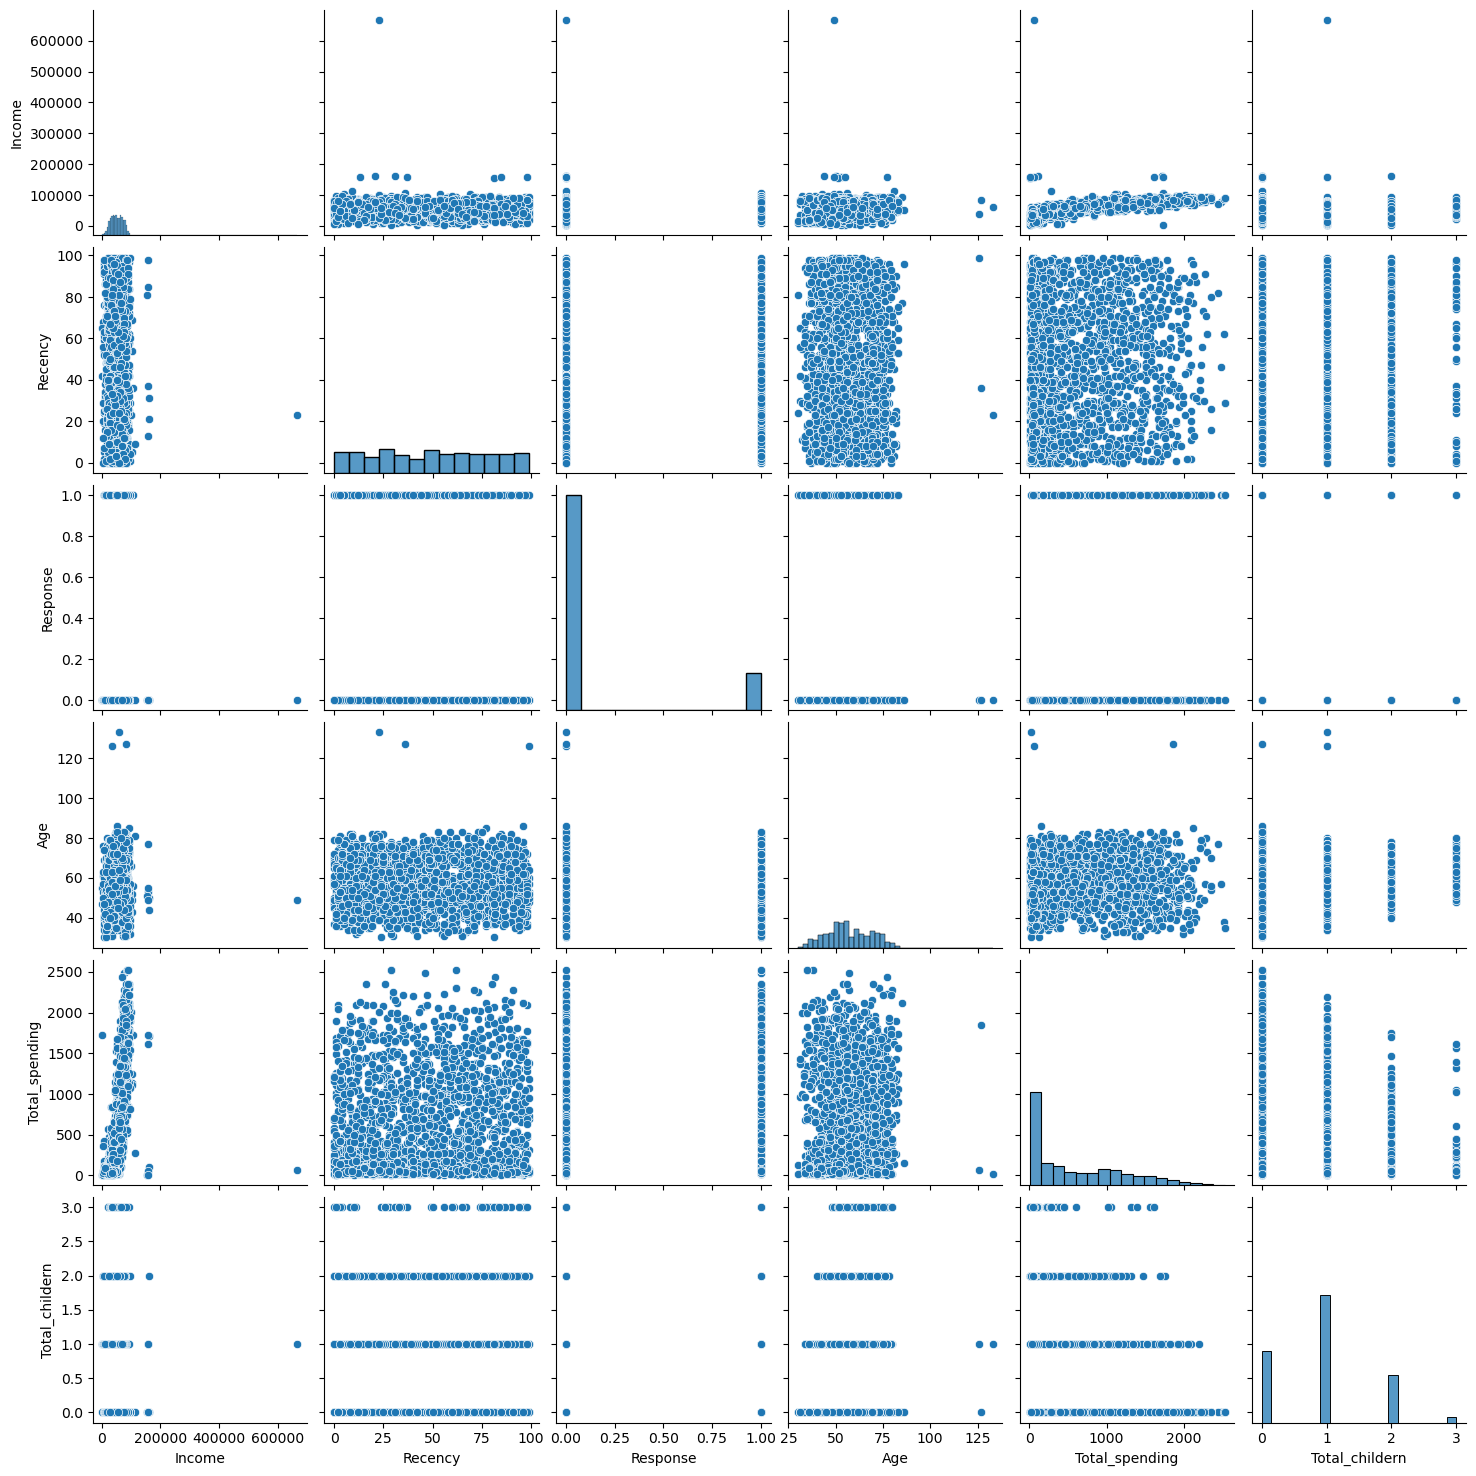

In [44]:
cols =["Income", "Recency","Response","Age","Total_spending","Total_childern"]

# relative plots of some features - pair plot(scatter plot for multi feature)
sns.pairplot(df_cleaned[cols])

In [45]:
# Remove the Outliers 

print("data size with outliers:" , len(df_cleaned))

df_cleaned = df_cleaned[(df_cleaned["Age"]<90)]
df_cleaned = df_cleaned[(df_cleaned["Income"]<600_000)]

print("data size without outliers:" , len(df_cleaned))


data size with outliers: 2240
data size without outliers: 2236


## Corelation of feature

### Heatmap

In [46]:
corr =df_cleaned.corr(numeric_only=True)

In [47]:
corr

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_spending,Total_childern
Income,1.000000,0.007829,-0.107169,0.450584,0.693781,0.628075,-0.646382,-0.027871,0.161121,0.198835,-0.023677,0.789375,-0.340550
Recency,0.007829,1.000000,-0.000638,-0.010776,0.025226,0.000771,-0.021850,0.005361,-0.198781,0.019396,0.024238,0.020842,0.017826
NumDealsPurchases,-0.107169,-0.000638,1.000000,0.233971,-0.008510,0.068418,0.347216,0.003636,0.002017,0.068286,0.218009,-0.064831,0.439682
NumWebPurchases,0.450584,-0.010776,0.233971,1.000000,0.378049,0.502227,-0.056204,-0.013250,0.148390,0.153873,0.191211,0.519948,-0.146429
NumCatalogPurchases,0.693781,0.025226,-0.008510,0.378049,1.000000,0.518788,-0.520376,-0.018304,0.220813,0.125285,0.095836,0.778343,-0.439631
NumStorePurchases,0.628075,0.000771,0.068418,0.502227,0.518788,1.000000,-0.429857,-0.011563,0.038702,0.139237,0.109727,0.675460,-0.321729
NumWebVisitsMonth,-0.646382,-0.021850,0.347216,-0.056204,-0.520376,-0.429857,1.000000,0.020796,-0.004397,-0.117498,0.272105,-0.499909,0.417908
Complain,-0.027871,0.005361,0.003636,-0.013250,-0.018304,-0.011563,0.020796,1.000000,0.000167,0.004450,0.035685,-0.033784,0.031480
Response,0.161121,-0.198781,0.002017,0.148390,0.220813,0.038702,-0.004397,0.000167,1.000000,-0.018557,0.194232,0.265615,-0.169451
Age,0.198835,0.019396,0.068286,0.153873,0.125285,0.139237,-0.117498,0.004450,-0.018557,1.000000,-0.016451,0.113618,0.095512


<Axes: >

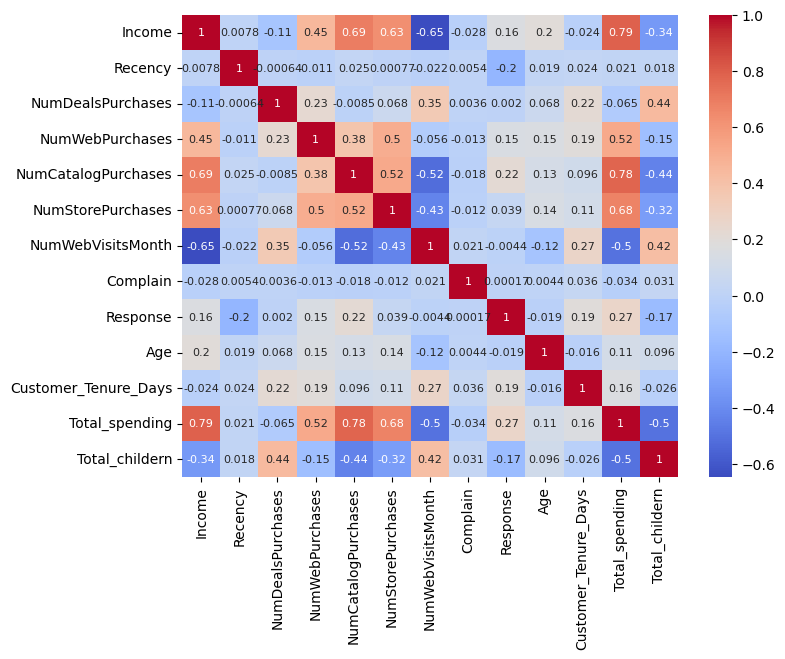

In [50]:
plt.figure(figsize=(8,6))

sns.heatmap(
    corr,
    annot=True,
    annot_kws={"size":8},
    cmap="coolwarm"
    
)

In [51]:
df_cleaned.head()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_spending,Total_childern,Living_With
0,Graduate,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,Alone
1,Graduate,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,Alone
2,Graduate,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,Partner
3,Graduate,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,Partner
4,Postgraduate,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,Partner


In [53]:
df_cleaned.shape

(2236, 15)

# Encoding

In [54]:
from sklearn.preprocessing import OneHotEncoder

In [55]:
df_cleaned.columns

Index(['Education', 'Income', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'Response', 'Age',
       'Customer_Tenure_Days', 'Total_spending', 'Total_childern',
       'Living_With'],
      dtype='object')

In [58]:
ohe = OneHotEncoder()

cat_cols =["Education","Living_With"]
enc_cols= ohe.fit_transform(df_cleaned[cat_cols])

In [61]:
enc_df = pd.DataFrame(enc_cols.toarray(),columns=ohe.get_feature_names_out(cat_cols), index=df_cleaned.index)

In [62]:
enc_df.head()

,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner
0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0


In [64]:
df_encoded = pd.concat([df_cleaned.drop(columns=cat_cols),enc_df],axis=1)

In [65]:
df_encoded.shape

(2236, 18)

In [66]:
df_encoded.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_spending,Total_childern,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0


# Scaling 

In [68]:
from sklearn.preprocessing import StandardScaler


In [69]:
X = df_encoded

In [71]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [72]:
X_scaled

array([[ 0.28894655,  0.30685572,  0.34873831, ..., -0.35877969,
         1.3476353 , -1.3476353 ],
       [-0.262003  , -0.38397129, -0.16869955, ..., -0.35877969,
         1.3476353 , -1.3476353 ],
       [ 0.91842301, -0.7984675 , -0.68613742, ..., -0.35877969,
        -0.74204052,  0.74204052],
       ...,
       [ 0.234898  ,  1.44672029, -0.68613742, ..., -0.35877969,
         1.3476353 , -1.3476353 ],
       [ 0.80780332, -1.42021181, -0.16869955, ..., -0.35877969,
        -0.74204052,  0.74204052],
       [ 0.04280841, -0.31488859,  0.34873831, ..., -0.35877969,
        -0.74204052,  0.74204052]])

# Visualize

In [73]:
X_scaled.shape

(2236, 18)

In [74]:
# 2D using PCA

from sklearn.decomposition import PCA


In [75]:
pca = PCA(n_components=2)
X_pca =pca.fit_transform(X_scaled)

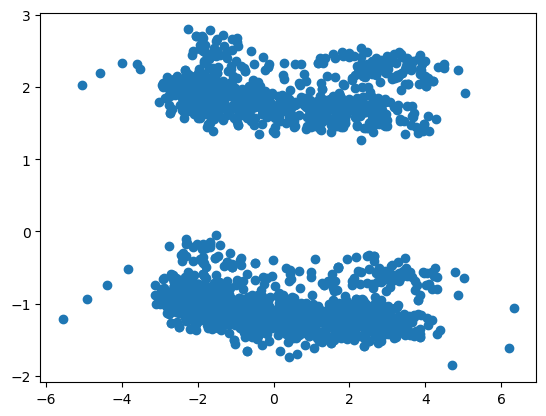

In [77]:
# plot

plt.scatter(X_pca[:,0],X_pca[:,1])

In [79]:
pca.explained_variance_ratio_

array([0.23163158, 0.11385454])

In [80]:
# 3D 

pca = PCA(n_components=3)
X_pca =pca.fit_transform(X_scaled)

In [81]:
pca.explained_variance_ratio_

array([0.23163158, 0.11385454, 0.10405815])

Text(0.5, 0.92, '3d projection')

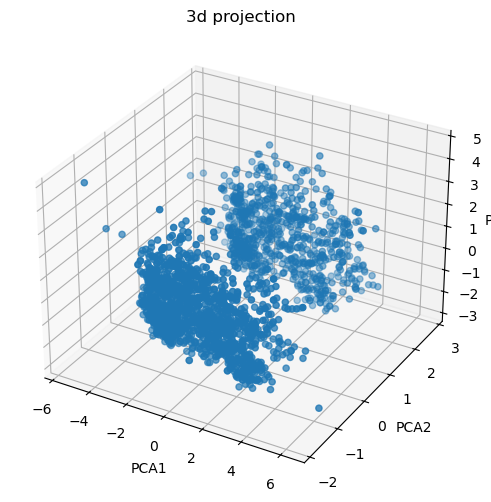

In [85]:
#plot

fig =plt.figure(figsize=(8,6))
ax = fig.add_subplot(111,projection="3d")

ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2])

ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title("3d projection")

# Analyze K value

## 1. Elbow Method

In [106]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
wcss =[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k , random_state=42)
    kmeans.fit_predict(X_pca)
    wcss.append(kmeans.inertia_)

In [107]:
wcss

[22082.680913560424,
 14745.953749136805,
 12887.083065383687,
 11269.010111322212,
 9090.88009203094,
 7944.138455409051,
 6884.613519562994,
 6201.304361483717,
 5705.9546357576055,
 5062.469899644633]

In [108]:
knee= KneeLocator(range(1,11),wcss ,curve="convex" ,direction="decreasing")
optimal_k =knee.elbow

In [109]:
print("best k =" ,optimal_k)

best k = 5


Text(0, 0.5, 'wcss')

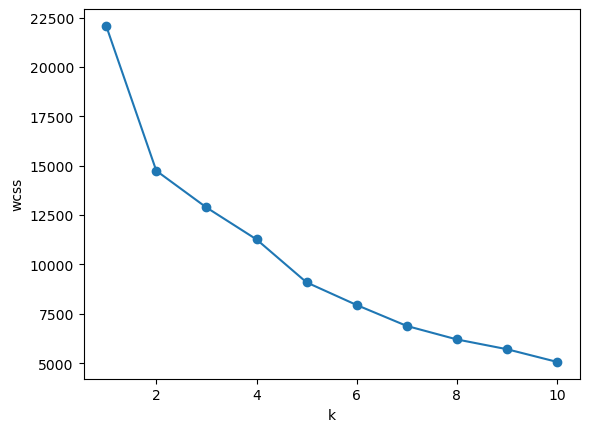

In [110]:
# plot 

plt.plot(range(1,11),wcss,marker='o')
plt.xlabel("k")
plt.ylabel("wcss")

## 2. Silhouette Score

In [115]:
from sklearn.metrics import silhouette_score

scores=[]

for k in range(2,11):
    kmeans = KMeans(n_clusters=k ,random_state=42)
    labels= kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca,labels)
    scores.append(score)

    



In [116]:
scores

[np.float64(0.30971804484538146),
 np.float64(0.27192554774260225),
 np.float64(0.27239282786848806),
 np.float64(0.3088109341856224),
 np.float64(0.30468832438421667),
 np.float64(0.3124861460077193),
 np.float64(0.3307393853069625),
 np.float64(0.34193886306373983),
 np.float64(0.3455840829404658)]

Text(0, 0.5, 'silhouette_score')

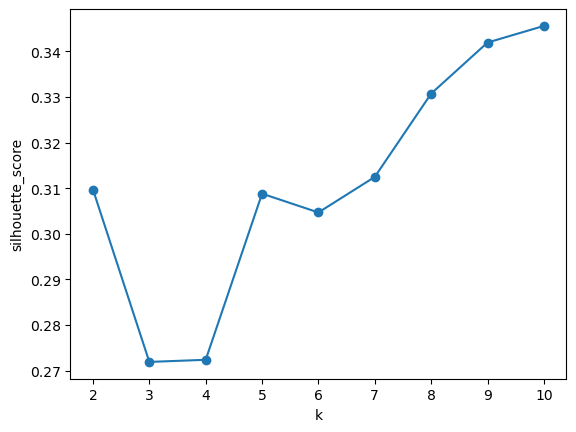

In [118]:
#plot 

plt.plot(range(2,11),scores,marker='o')
plt.xlabel("k")
plt.ylabel("silhouette_score")

Text(0, 0.5, 'SS')

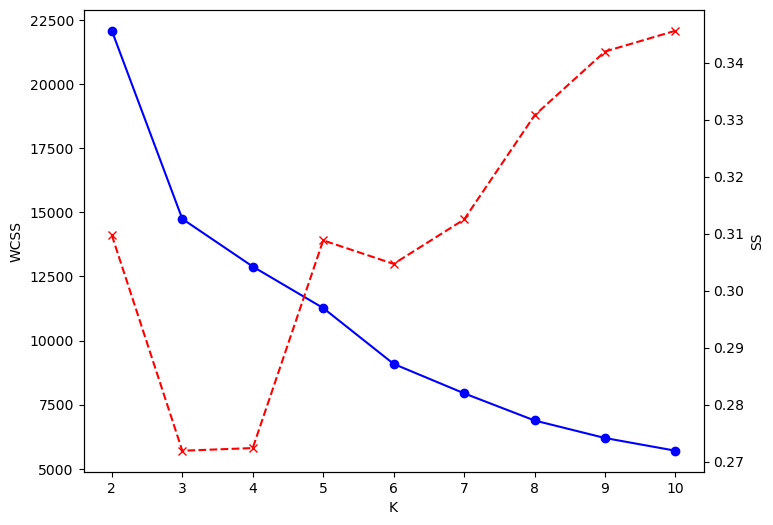

In [126]:

# combined plot 

k_range = range(2,11)
fig,ax1 =plt.subplots(figsize=(8,6))

ax1.plot(k_range ,wcss[:len(k_range)],marker="o" ,color="blue")
ax1.set_xlabel("K")
ax1.set_ylabel("WCSS")

ax2 = ax1.twinx()
ax2.plot(k_range ,scores[:len(k_range)],marker="x" ,color="red" , linestyle="--")
ax2.set_ylabel("SS")

# Clustering

In [141]:
# K_means

kmeans = KMeans(n_clusters=5, random_state =42)
labels_means =kmeans.fit_predict(X_pca)

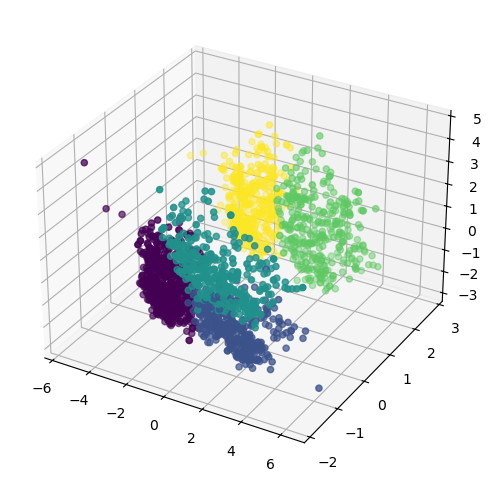

In [142]:
fig =plt.figure(figsize=(8,6))
ax = fig.add_subplot(111,projection="3d")

ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2] , c=labels_means)

In [143]:
# Agglomerative Clustering

from sklearn.cluster import AgglomerativeClustering

In [144]:
agg_clf = AgglomerativeClustering(n_clusters=5,linkage="ward")
labels_agg = agg_clf.fit_predict(X_pca)

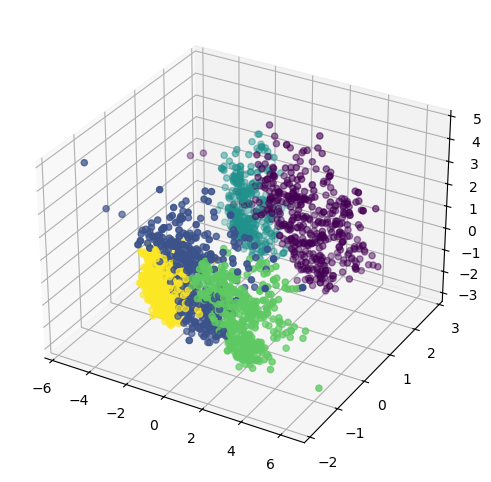

In [145]:
fig =plt.figure(figsize=(8,6))
ax = fig.add_subplot(111,projection="3d")

ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2] , c=labels_agg)

# Characterization of Cluster

In [157]:

X["cluster"]=labels_agg

In [158]:
X.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_spending,Total_childern,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner,cluster
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0,0
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0,2
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0,1
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0,4
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0,1


<Axes: xlabel='cluster', ylabel='count'>

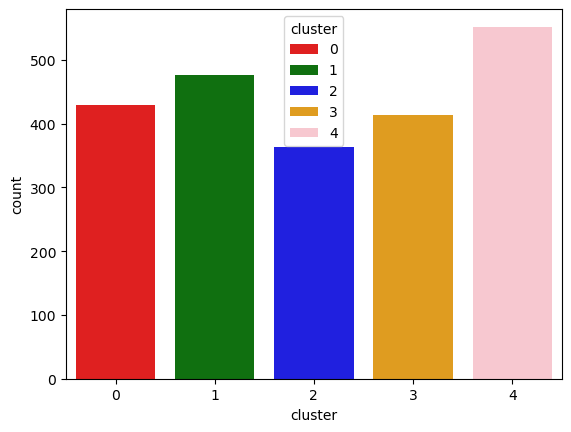

In [160]:
pal = ["red" ,"green","blue","orange","pink"]

sns.countplot(x=X["cluster"] ,palette=pal , hue=X["cluster"])

<Axes: xlabel='Total_spending', ylabel='Income'>

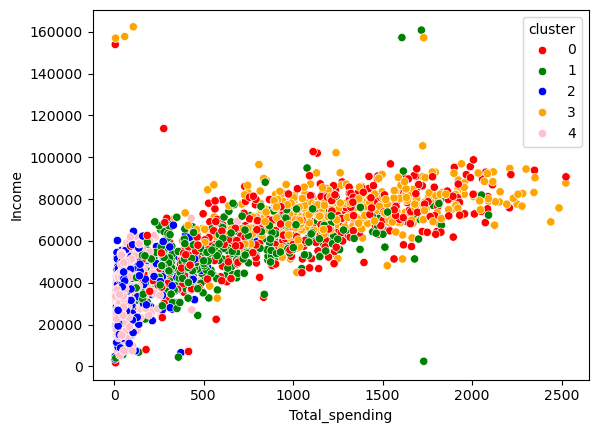

In [161]:
# Income & Spending patterns

sns.scatterplot(x=X["Total_spending"],y=X["Income"] , hue=X["cluster"] ,palette=pal)

In [164]:
# cluster summary

cluster_summary =X.groupby("cluster").mean()
print(cluster_summary)

               Income    Recency  NumDealsPurchases  NumWebPurchases  \
cluster                                                                
0        66279.404651  49.439535           2.430233         5.700000   
1        53477.594340  50.641509           3.874214         5.706499   
2        35326.263736  49.038462           2.049451         2.189560   
3        74726.958838  47.399516           1.358354         5.208232   
4        33398.721920  48.882246           1.813406         1.846014   

         NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
cluster                                                                        
0                   4.462791           7.893023           4.390698  0.006977   
1                   2.572327           6.465409           6.180294  0.008386   
2                   0.612637           3.269231           6.390110  0.010989   
3                   5.668281           8.663438           2.939467  0.004843   
4              